# About this notebook


本notebookは、@nischaydnk による [このノートブック](https://www.kaggle.com/code/nischaydnk/hms-submission-1d-eegnet-pipeline-lightning) の修正バージョン

[こちら](https://www.kaggle.com/competitions/hms-harmful-brain-activity-classification/Discussion/477498) に記載されているように、ターゲットに「0.166666667」を追加すると、CV/LB ギャップが減少します。

また、この [ノートブック](https://www.kaggle.com/code/alejopaullier/hms-wavenet-pytorch-train/notebook) のデータの前処理も使用しました。

オプティマイザーを [Adan](https://github.com/lucidrains/Adan-pytorch) に変更すると、CV スコアが改善されました。

このモデルは、[Chris Deotte](https://www.kaggle.com/code/cdeotte/how-to-make-spectrogram-from-eeg/notebook) によって共有されている生の EEG 信号から 8 チャネルのみを使用します。
このノートブックで多くの実験を行い、モデルのアーキテクチャを変更し、クロスエントロピー損失を追加し、データを操作してスコアが向上するかどうかを確認します。

**If you find this notebook usefull please upvote and stay tuned**

## Version1

* `CV=0.5162483866506282` `LB=0.48`

### Hyperparams

```
   scheduler='CosineAnnealingWarmRestarts' 
    print_freq=50
    num_workers = 1
    model_name = 'resnet501d_lstm'
    optimizer='Adam'
    epochs = 20
    eps = 1e-6
    lr = 8e-3
    min_lr = 1e-6
    in_channels = 1
    batch_size = 64
    weight_decay = 1e-3
    seed = 2024
```

## Version 2 
* このバージョンでは、モデルはこの [ノートブック](https://www.kaggle.com/code/alejopaullier/hms-wavenet-pytorch-train) のようにモンタージュを個別に評価します。
* `CV=0.5162483866506282` `LB=0.55`

### Hyperparams
```
   scheduler='CosineAnnealingWarmRestarts' 
    print_freq=50
    num_workers = 1
    model_name = 'resnet501d_lstm'
    optimizer='Adam'
    epochs = 20
    eps = 1e-6
    lr = 8e-3
    min_lr = 1e-6
    in_channels = 1
    batch_size = 32
    weight_decay = 1e-2
    max_grad_norm = 1e7
    seed = 2024
```


## Version 3

* Added sequence pooling for the rrnn output

シーケンス プーリング層は、CCT の [CLASS] トークンの代わりに使用されます。 この層では、モデルが 1 つの特別な [CLASS] トークンから出力を取得したり、すべてのシーケンスの単純な平均から出力を取得するのではなく、すべてのシーケンスにわたって加重平均を実行できるようにする学習可能な重みが導入されています。
この [ノートブック](https://www.kaggle.com/code/utsavnandi/compact-convolutional-transformer-using-pytorch) から引用しました。

```
class SeqPool(nn.Module):
    def __init__(self, emb_dim=192):
        super().__init__()
        self.dense = nn.Linear(emb_dim, 1)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        bs, seq_len, emb_dim = x.shape
        identity = x
        x = self.dense(x)
        x = x.permute(0, 2, 1)
        x = self.softmax(x)
        x = x @ identity
        x = x.reshape(x.shape[0], -1)
        return x
```

### Hyperparams
```
   scheduler='CosineAnnealingWarmRestarts' 
    print_freq=50
    num_workers = 1
    model_name = 'resnet501d_gru'
    optimizer='Adan'
    epochs = 20
    eps = 1e-6
    lr = 8e-3
    min_lr = 1e-6
    in_channels = 8
    batch_size = 64
    weight_decay = 1e-2
    max_grad_norm = 1e7
    seed = 2024
```

## Version 4

データセットを 2 つの母集団に分割し、バージョン 1 から 2 段階のモデルをトレーニングしました。 私はこの [ノートブック](https://www.kaggle.com/code/seanbearden/effnetb0-2-pop-model-train-twice-lb-0-39/notebook) からアイデアを得ました。

### Hyperparams

```
    scheduler='CosineAnnealingWarmRestarts' 
    print_freq=50
    num_workers = 1
    model_name = 'resnet501d_gru'
    optimizer='Adan'
    epochs = 20
    eps = 1e-6
    lr = 8e-3
    min_lr = 1e-6
    in_channels = 8
    batch_size = 64
    weight_decay = 1e-2
    max_grad_norm = 1e7
    seed = 2024
```

## Version 5

* CV スキームを [こちら](https://www.kaggle.com/competitions/hms-harmful-brain-activity-classification/Discussion/477461)で述べられているように変更。
* 前のバージョンの `optimizer.zero_grad()` を忘れてください。
* `CV=0.5607182806499342` `LB=0.44`

### Hyperparams

```
    scheduler='CosineAnnealingWarmRestarts' 
    print_freq=50
    num_workers = 1
    model_name = 'resnet501d_gru'
    optimizer='Adan'
    stage1_epochs = 10
    stage2_epochs = 20
    eps = 1e-6
    lr = 8e-3
    min_lr = 1e-6
    in_channels = 8
    batch_size = 64
    weight_decay = 1e-2
    max_grad_norm = 1e7
    seed = 2024
    
```

## Version 6

* CV スキームを変更しました。第 1 段階はすべてのデータでトレーニングし、第 2 段階は `total_evaluators >= 10` のデータでトレーニングします。

### Hyperparams

```
    scheduler='OneCycleLR' 
    print_freq=50
    num_workers = 1
    model_name = 'resnet501d_gru'
    optimizer='Adan'
    stage1_epochs = 10
    stage2_epochs = 20
    eps = 1e-6
    lr = 1e-3
    min_lr = 1e-6
    in_channels = 8
    batch_size = 100
    weight_decay = 1e-2
    max_grad_norm = 1e7
    seed = 2024
    
```

## Version 7
* CV の表現を変更し、第 1 段階のトレインを全データに、第 2 段階のトレインを train_pop2 に変更しました。

### Hyperparams

```
    scheduler='OneCycleLR' 
    print_freq=50
    num_workers = 1
    model_name = 'resnet501d_gru'
    optimizer='Adan'
    stage1_epochs = 10
    stage2_epochs = 10
    eps = 1e-6
    lr = 1e-3
    min_lr = 1e-6
    in_channels = 8
    batch_size = 64
    weight_decay = 1e-2
    max_grad_norm = 1e7
    seed = 2024
    
```

## Version 8

* 5 倍のダウンサンプリングを適用する
* `ステージ1 LB=0.6` `ステージ2 LB=0.59`

### Hyperparams

```

    scheduler='CosineAnnealingWarmRestarts' 
    print_freq=50
    num_workers = 1
    model_name = 'resnet501d_gru'
    optimizer='Adan'
    stage1_epochs = 10
    stage2_epochs = 20
    eps = 1e-6
    lr = 1e-3
    min_lr = 1e-6
    in_channels = 8
    batch_size = 64
    weight_decay = 1e-2
    downsample_factor = 5
    max_grad_norm = 1e7
    seed = 2024
    
```

## Version9

* Stage2 投票数 >= 5
* ダウンサンプリング係数 5


### Hyperparams


```
    scheduler='CosineAnnealingWarmRestarts' 
    print_freq=50
    num_workers = 1
    model_name = 'resnet501d_gru'
    optimizer='Adan'
    stage1_epochs = 10
    stage2_epochs = 10
    eps = 1e-6
    lr = 1e-3
    min_lr = 1e-6
    in_channels = 8
    batch_size = 64
    weight_decay = 1e-2
    downsample_factor = 5
    max_grad_norm = 1e7
    seed = 2024
    
```

# Directory settings

In [1]:
# ====================================================
# directory settings
# ====================================================

import os

OUTPUT_DIR = './'
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)
    
POP_2_DIR = OUTPUT_DIR + 'pop_2_weight_oof/'
if not os.path.exists(POP_2_DIR):
    os.makedirs(POP_2_DIR)
    
POP_1_DIR = OUTPUT_DIR + 'pop_1_weight_oof/'
if not os.path.exists(POP_1_DIR):
    os.makedirs(POP_1_DIR)

# Library

In [2]:
import os
import gc
from glob import glob
import sys
import math
import time
import random
import shutil
from pathlib import Path
from typing import Dict, List
from scipy.stats import entropy
from scipy.signal import butter, lfilter, freqz
from contextlib import contextmanager
from collections import defaultdict, Counter
# sys.path.append('/kaggle/input/kaggle-kl-div')
sys.path.append('../input/kaggle-kl-div')
from kaggle_kl_div import score
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss
from tqdm.auto import tqdm
from functools import partial
# 以下、後でコメントアウト消す
# import cv2
from PIL import Image
import torch
import torch.nn as nn
# import pytorch_lightning as pl
import torch.nn.functional as F
from torch.optim import Adam, SGD, AdamW
# import torchvision.models as models
from torch.nn.parameter import Parameter
from torch.utils.data import DataLoader, Dataset
from torch.optim.lr_scheduler import ReduceLROnPlateau, OneCycleLR, CosineAnnealingLR, CosineAnnealingWarmRestarts
from sklearn.preprocessing import LabelEncoder
# from torchvision.transforms import v2
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import train_test_split
# import albumentations as A
# from albumentations import (Compose, Normalize, Resize, RandomResizedCrop, HorizontalFlip, VerticalFlip, ShiftScaleRotate, Transpose)
# from albumentations.pytorch import ToTensorV2
# from albumentations import ImageOnlyTransform
# import timm
import warnings 
warnings.filterwarnings('ignore')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
from matplotlib import pyplot as plt
import joblib
os.environ['CUDA_VISIBLE_DEVICES'] = "0,1"
VERSION=9

In [3]:
# ====================================================
# CFG
# ====================================================

class CFG:
    wandb = False
    debug = False
    train=True
    apex=True
    visualize=True
    stage1_pop1=True
    stage2_pop2=False

    # 学習スケジューラと各スケジューラのパラメータ
    scheduler='CosineAnnealingWarmRestarts' # ['ReduceLROnPlateau', 'CosineAnnealingLR', 'CosineAnnealingWarmRestarts','OneCycleLR']
    # CosineAnnealingLR params
    cosanneal_params={
        'T_max':6,
        'eta_min':1e-5,
        'last_epoch':-1
    }
    #ReduceLROnPlateau params
    reduce_params={
        'mode':'min',
        'factor':0.2,
        'patience':4,
        'eps':1e-6,
        'verbose':True
    }
    # CosineAnnealingWarmRestarts params
    cosanneal_res_params={
        'T_0':20,
        'eta_min':1e-6,
        'T_mult':1,
        'last_epoch':-1
    }

    # リソースの設定
    print_freq=50
    num_workers = 1
    # モデル学習の設定
    model_name = 'resnet1d_gru'
    optimizer='Adan'
    # 学習のハイパラメータ
    epochs = 10
    factor = 0.9
    patience = 2
    eps = 1e-6
    lr = 1e-3
    min_lr = 1e-6
    in_channels = 8
    batch_size = 64
    weight_decay = 1e-2
    batch_scheduler = True
    gradient_accumulation_steps = 1
    max_grad_norm = 1e7
    seed = 2024
    
    # 目標列に関する設定
    target_cols = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']
    target_size = 6
    pred_cols = ['pred_seizure_vote', 'pred_lpd_vote', 'pred_gpd_vote', 'pred_lrda_vote', 'pred_grda_vote', 'pred_other_vote']
    n_fold = 5
    trn_fold = [0, 1, 2, 3, 4]

    # PATHに関する設定
    # PATH = '/kaggle/input/hms-harmful-brain-activity-classification/'
    # data_root = "/kaggle/input/hms-harmful-brain-activity-classification/train_eegs/"
    # raw_eeg_path = "/kaggle/input/brain-eegs/eegs.npy"
    PATH = '../input/hms-harmful-brain-activity-classification/'
    data_root = "../input/hms-harmful-brain-activity-classification/train_eegs/"
    raw_eeg_path = "../input/brain-eegs/eegs.npy"

# Utils

In [4]:
def init_logger(log_file=OUTPUT_DIR+'train.log'):
    # loggerを初期化
    # @Args:
    #   ログファイルのパス

    from logging import getLogger, INFO, FileHandler,  Formatter,  StreamHandler
    logger = getLogger(__name__)                    # ロガーを作成し、__name__をロガー名とする。通常モジュール名と同名
    logger.setLevel(INFO)                           # ロガーのログレベルを設定
    handler1 = StreamHandler()                      # コンソールにログメッセージを出力するためのハンドラを作成
    handler1.setFormatter(Formatter("%(message)s")) # コンソールハンドラのフォーマッタを設定
    handler2 = FileHandler(filename=log_file)       # ファイルにログメッセージを書き込むためのハンドラを作成, log_fileパラメータで指定されたファイルにログが記録される
    handler2.setFormatter(Formatter("%(message)s")) # ファイルハンドラのフォーマッタを設定
    logger.addHandler(handler1)                     # ロガーにコンソールハンドラを追加
    logger.addHandler(handler2)                     # ロガーにファイルハンドラを追加
    return logger                                   # 初期化されたロガーを返す

LOGGER = init_logger()

def get_score(preds, targets):
    # cvを計算
    oof = pd.DataFrame(preds.copy())    # 交差検証の各フォールドでの予測値oof (out-of-fold)
    oof['id'] = np.arange(len(oof))

    true = pd.DataFrame(targets.copy()) # 真の値
    true['id'] = np.arange(len(true))

    cv = score(solution=true, submission=oof, row_id_column_name='id')
    return cv

def butter_bandpass(lowcut, highcut, fs, order=5):
    # バンドパスフィルタの伝達関数を計算
    # @Args:
    #   lowcut, highcut: カットオフ周波数の下限, 上限 
    #   fs: サンプリング周波数
    #   order: フィルタの次数
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data) # FIR（有限インパルス応答）フィルタ処理をおこない、出力信号を生成
    return y


def denoise_filter(x):
    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 200.0
    lowcut = 1.0
    highcut = 25.0
    
    # Filter a noisy signal.
    T = 50
    nsamples = T * fs
    t = np.arange(0, nsamples) / fs
    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6) # バンドパスフィルタを適用した信号を取得
    y = (y + np.roll(y,-1)+ np.roll(y,-2)+ np.roll(y,-3))/4     # 3つの遅延信号と元の信号を平均化
    y = y[0:-1:4]                                               # 信号をダウンサンプリング
    
    return y

class KLDivLossWithLogits(nn.KLDivLoss):
    # PyTorchのnn.KLDivLossクラスを継承し、特定の設定における予測値の分布と真の値の分布の違いを評価する

    def __init__(self):
        # 親クラスのコンストラクタを初期化
        super().__init__(reduction="batchmean") # バッチ内の平均を計算

    def forward(self, y, t):
        # 親クラスのforwardメソッドをオーバーライドする。
        # 予測値に対して対数ソフトマックス関数を適用し、親クラスのforwardメソッドを呼び出してKLDiv損失を計算する
        y = nn.functional.log_softmax(y,  dim=1)
        loss = super().forward(y, t)

        return loss



def seed_torch(seed=42):
    random.seed(seed)                           # ランダムシードの設定
    os.environ['PYTHONHASHSEED'] = str(seed)    # ハッシュ関数のシード値
    np.random.seed(seed)                        # Numpyの乱数生成器のシードを設定
    torch.manual_seed(seed)                     # PyTorchのCPU用の乱数生成器のシードを設定
    torch.cuda.manual_seed(seed)                # PyTorchのGPU用の乱数生成器のシードを設定
    
target_preds = [x + "_pred" for x in ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']] # 予測結果のラベル名
label_to_num = {'Seizure': 0, 'LPD': 1, 'GPD': 2, 'LRDA': 3, 'GRDA': 4, 'Other':5}  # key: ラベル名, value: 数値 の辞書
num_to_label = {v: k for k, v in label_to_num.items()}                              # key: 数値, value: ラベル名 の辞書
seed_torch(seed=CFG.seed)   # PyTorchの乱数生成が指定されたシード値に基づいて行われる

# Load train data

Train shape: (106800, 15)
Targets ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']
There are 1950 patients in the training data.
There are 17089 EEG IDs in the training data.
There are 20183 unique eeg_id + votes in the training data.


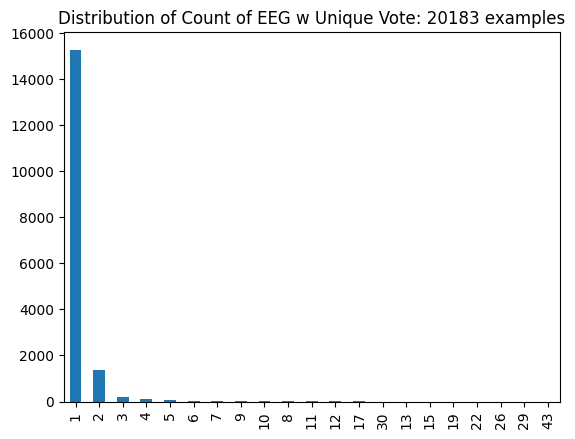

In [5]:
# train = pd.read_csv('/kaggle/input/hms-harmful-brain-activity-classification/train.csv')
train = pd.read_csv('../input/hms-harmful-brain-activity-classification/train.csv')
TARGETS = train.columns[-6:]
print('Train shape:', train.shape )
print('Targets', list(TARGETS))

# evaluatorの数が少ないレコードをRe-labellingする
train['total_evaluators'] = train[['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']].sum(axis=1)

train_uniq = train.drop_duplicates(subset=['eeg_id'] + list(TARGETS)) # eeg_id と [TARGET_list]でuniqueをとる
train_uniq.head()

print(f'There are {train.patient_id.nunique()} patients in the training data.')         # 患者のunique数
print(f'There are {train.eeg_id.nunique()} EEG IDs in the training data.')              # eeg_idのunique数
print(f'There are {train_uniq.shape[0]} unique eeg_id + votes in the training data.')   # eeg_idとvoteのunique数: 同じeeg_idでも、offsetによって異なるvoteがされている

# train_uniq.eeg_id.value_counts()                  : あるeeg_idの出現数(=uniqueなVote数)
# train_uniq.eeg_id.value_counts().value_counts()   : uniqueなVote数の出現数
train_uniq.eeg_id.value_counts().value_counts().plot(kind='bar', title=f'Distribution of Count of EEG w Unique Vote: '
                                                                    f'{train_uniq.shape[0]} examples');

del train_uniq
_ = gc.collect()

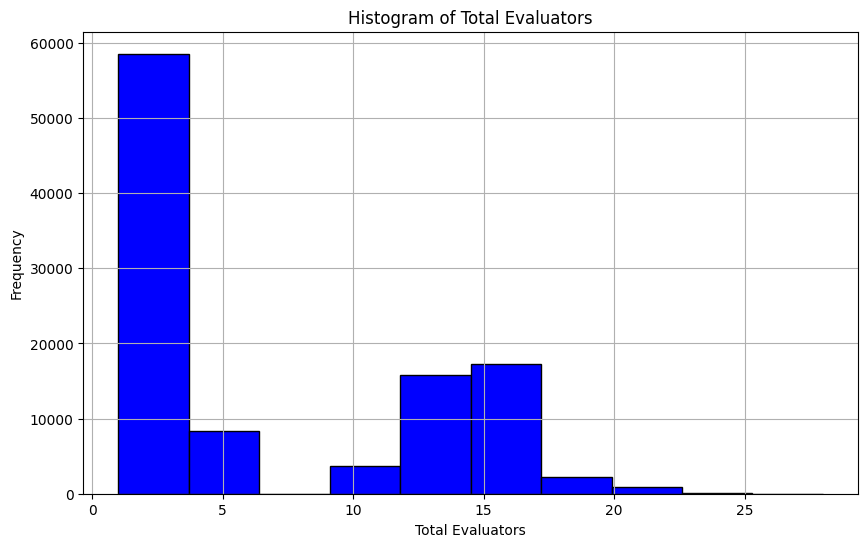

In [6]:
# あるeeg_idに対するevaluatorの数の分布
plt.figure(figsize=(10, 6))
plt.hist(train['total_evaluators'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Total Evaluators')
plt.xlabel('Total Evaluators')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [7]:
eeg_df = pd.read_parquet(CFG.data_root + "100261680.parquet")
eeg_features = eeg_df.columns
print(f'There are {len(eeg_features)} raw eeg features')
print(list(eeg_features))

# ここでは、20個中8個のEEGに限定している
eeg_features = ['Fp1','T3','C3','O1','Fp2','C4','T4','O2']
feature_to_index = {x:y for x,y in zip(eeg_features, range(len(eeg_features)))}

del eeg_df
_ = gc.collect()

There are 20 raw eeg features
['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz', 'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2', 'EKG']


**一意の eeg_id と投票分布の組み合わせの EEG スペクトログラム**

- @cdeotte のノートブックを変更して、生の EEG 入力のスペクトログラムを生成しました。
- EEG の中央の 10,000 データ ポイントの配列をスライスするのではなく、**オフセット (eeg_label_offset_seconds) を使用してスライス**します。
- このため、**スペクトログラムは eeg_id ではなく label_id によって保存される**ため、各サンプルには固有の EEG スペクトログラムが含まれます。
- EEG スペクトログラムの数を減らすために、投票分布とペアになった重複した eeg_id を削除し、サンプル サイズを 20,183 に減らします。
- これは元のノートブックよりも 3,094 サンプル多く、それぞれのサンプルの投票分布にはわずかな違いがあります。

このデータセットはローカル プロセッサ (M1 Max) で生成されましたが、再現性を高めるために変更を加えたノートブックを公開しました。

In [8]:
%%time
# all_eeg_specs = np.load('/kaggle/input/eeg-spectrogram-by-lead-id-unique/eeg_specs.npy',allow_pickle=True).item()
all_eeg_specs = np.load('../input/eeg-spectrogram-by-lead-id-unique/eeg_specs.npy',allow_pickle=True).item()

CPU times: total: 141 ms
Wall time: 11.9 s


# Deduplicate Train EEG Id

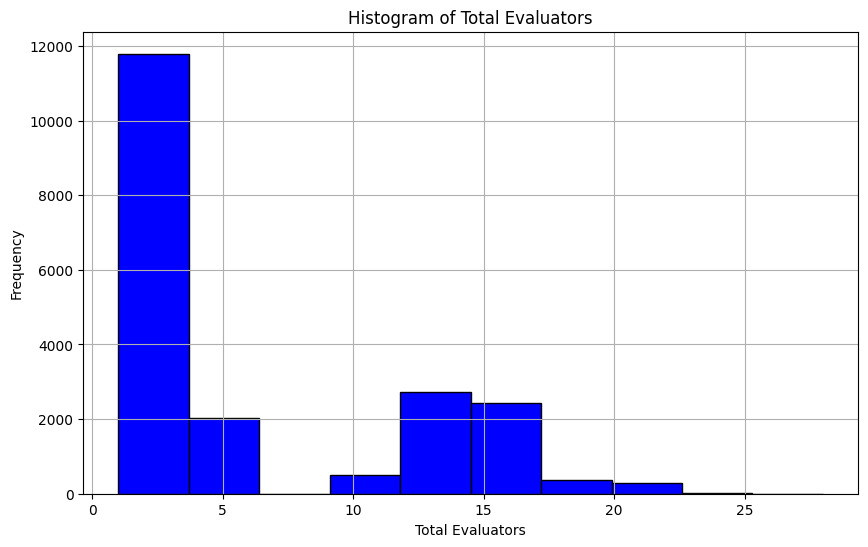

In [9]:
train = train[train['label_id'].isin(all_eeg_specs.keys())].copy()

y_data = train[TARGETS].values +  0.166666667 # Regularization value
y_data = y_data / y_data.sum(axis=1,keepdims=True)
train[TARGETS] = y_data

train['target'] = train['expert_consensus']
train = train.reset_index(drop=True)



plt.figure(figsize=(10, 6))
plt.hist(train['total_evaluators'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Total Evaluators')
plt.xlabel('Total Evaluators')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

del all_eeg_specs
_ = gc.collect()

# CV Scheme

In [10]:
gkf = GroupKFold(n_splits=CFG.n_fold)

train["fold"] = -1

for fold_id, (_, val_idx) in enumerate(
    gkf.split(train, y=train["target"], groups=train["patient_id"])
):
    train.loc[val_idx, "fold"] = fold_id

# Parquet to EEG Signals Numpy Processing

In [11]:
def eeg_from_parquet(parquet_path: str, display: bool = False) -> np.ndarray:
    """
    この関数はparquetファイルを読み取り、読み取り値の中央の 50 秒を抽出します。
    次に、NaNを無視した平均値でNaN 値を埋めます
    @Args:
     :param parquet_path: 寄木細工ファイルへのパス。
     :param display: EEG プロットを表示するかどうか。
    @Returs:
     :return  np.array (time_steps, eeg_features) -> (10_000, 8)
    """
    # === 中央の50秒を取得する ===
    eeg = pd.read_parquet(parquet_path, columns=eeg_features)
    rows = len(eeg)                 # データの全行数
    offset = (rows - 10_000) // 2 # 50 * 200 = 10_000, 中央の50秒のデータを取得するためのオフセット
    eeg = eeg.iloc[offset:offset+10_000] # 中央の50秒（10_000行）を得る
    if display: 
        plt.figure(figsize=(10,5))
        offset = 0
    # === NumPyに変換 ===
    data = np.zeros((10_000, len(eeg_features)))    # 同じサイズ（行×列）のゼロで初期化されたNumPy配列
    for index, feature in enumerate(eeg_features):  # 各EEG特徴量に対して処理
        x = eeg[feature].values.astype('float32')   # float32に変換
        mean = np.nanmean(x)                        # NaNを無視した平均を計算
        nan_percentage = np.isnan(x).mean()         # 特徴量内のNaNの割合
        # === NaNを埋める ===
        if nan_percentage < 1: # 特徴量の一部がNaNの場合
            x = np.nan_to_num(x, nan=mean)
        else: # 全ての値がNANの場合
            x[:] = 0
        data[:, index] = x # 変換された特徴量データをNumPy配列に格納
        if display: 
            if index != 0:
                offset += x.max()
            plt.plot(range(10_000), x-offset, label=feature)
            offset -= x.min()
    if display:
        plt.legend()
        name = parquet_path.split('/')[-1].split('.')[0]
        plt.yticks([])
        plt.title(f'EEG {name}',size=16)
        plt.show()    
    return data

0it [00:00, ?it/s]

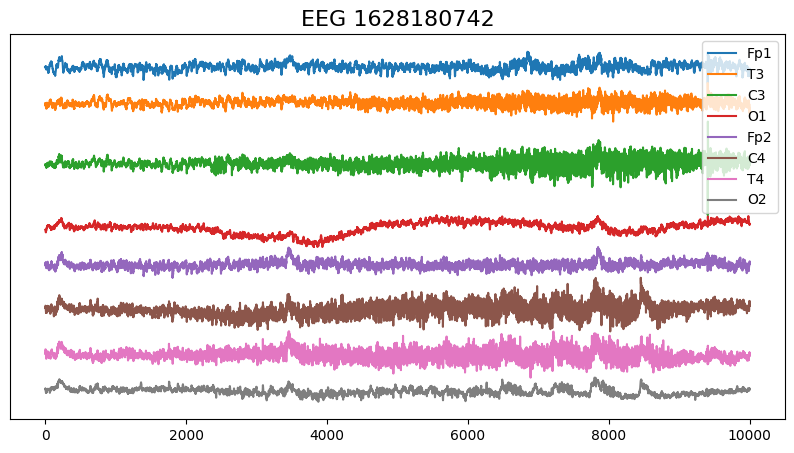

Processing 17089 eeg parquets... CPU times: total: 12.3 s
Wall time: 4min 38s


In [12]:
%%time
# Chrisのコード
# EEGデータのParquetファイルをNumpy辞書に変換
# eeg_from_parquet関数で、生のEEGデータに対して前処理をおこなう

CREATE_EEGS = False
# CREATE_EEGS = True
all_eegs = {}
visualize = 1
eeg_paths = glob(CFG.data_root + "*.parquet")
eeg_ids = train.eeg_id.unique()

for i, eeg_id in tqdm(enumerate(eeg_ids)):  
    # Save EEG to Python dictionary of numpy arrays
    eeg_path = CFG.data_root + str(eeg_id) + ".parquet"
    data = eeg_from_parquet(eeg_path, display=i<visualize)              
    all_eegs[eeg_id] = data
    
    if i == visualize:
        if CREATE_EEGS:
            print(f'Processing {train.eeg_id.nunique()} eeg parquets... ',end='')
        else:
            print(f'Reading {len(eeg_ids)} eeg NumPys from disk.')
            break
            
if CREATE_EEGS: 
    np.save('eegs', all_eegs)
else:
    # all_eegs = np.load('/kaggle/input/brain-eegs/eegs.npy',allow_pickle=True).item()
    all_eegs = np.load('../input/brain-eegs/eegs.npy',allow_pickle=True).item()

# Dataset

In [14]:
from scipy.signal import butter, lfilter

def quantize_data(data, classes):
    '''
    @Args:
    data: 符号化するデータ
    classes: 符号化のクラス数
    @Returns:
    mu_x: 符号化されたデータ
    '''
    mu_x = mu_law_encoding(data, classes) # 符号化
    return mu_x#quantized

def mu_law_encoding(data, mu):
    '''
    mu-law符号化: 音声信号の非線形符号化手法, 音声圧縮に利用
    @Args:
    data: 符号化するデータ
    mu: mu-lawパラメータ, 符号化のクラス数
    @Returns:
    符号化されたデータ
    '''
    mu_x = np.sign(data) * np.log(1 + mu * np.abs(data)) / np.log(mu + 1)
    return mu_x

def mu_law_expansion(data, mu):
    '''
    mu-law符号化されたデータをもとのデータに戻す
    '''
    s = np.sign(data) * (np.exp(np.abs(data) * np.log(mu + 1)) - 1) / mu
    return s

def butter_lowpass_filter(data, cutoff_freq=20, sampling_rate=200, order=4):
    '''
    ローパスフィルタの適用
    @Args:
    data: 対象データ
    cutoff_freq: カットオフ周波数の下限（デフォルト: 20Hz）
    sampling_rate: サンプリングレート（デフォルト: 200Hz）
    order: フィルタの次数（デフォルト: 4）
    @Returns:
    
    '''
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = lfilter(b, a, data, axis=0)
    return filtered_data

class EEGDataset(Dataset):
    """
    PyTorchのDatasetクラスを継承したEEGDatasetクラスを定義
    EEGデータを前処理し、NNの入力として使用
    """

    def __init__(
        self, df: pd.DataFrame, config, mode: str = 'train',
        eegs: Dict[int, np.ndarray] = all_eegs, downsample: int = None
    ):
        '''
        EEGDatasetオブジェクトを作る際の初期化メソッド
        obj = EEGDataset(**params)で初期化される
        **paramsに各パラメータを与えてやればよい
        df          : データフレーム
        config      : 設定オブジェクト
        mode        : モード(train, val, test)  
        eeg         : EEGデータの辞書
        downsample  : ダウンサンプリング率
        '''
        self.df = df
        self.config = config
        self.mode = mode
        self.eegs = eegs
        self.downsample = downsample
        
    def __len__(self):
        """
        Length of dataset.
        データセットの長さを返す。データフレームdfの行数に等しくなる。
        """
        return len(self.df)
        
    def __getitem__(self, index):
        """
        Get one item.
        指定されたインデックスのデータを取得し、前処理を行い、PyTorchのTensorとして返す
        """
        # __data_generationメソッドを呼び出し、EEGデータ(X)と目標値(y_prob)を取得
        X, y_prob = self.__data_generation(index)

        # 必要に応じてダウンサンプリング
        if self.downsample is not None:
            X = X[::self.downsample,:]
        
        # EEGデータと目標値をPyTorchのTensorに変換し、辞書として返す。
        output = {
            "eeg": torch.tensor(X, dtype=torch.float32),
            "labels": torch.tensor(y_prob, dtype=torch.float32)
        }
        return output
                        
    def __data_generation(self, index):
        """
        EEGデータの前処理とフィルタリングをおこなう
        """
        row = self.df.iloc[index] # 対応するindexのEEGデータを読み込み
        X = np.zeros((10_000, 8), dtype='float32')
        y = np.zeros(6, dtype='float32')
        data = self.eegs[row.eeg_id]

        # === Feature engineering ===
        # 電極間の差分をとる
        X[:,0] = data[:,feature_to_index['Fp1']] - data[:,feature_to_index['T3']]
        X[:,1] = data[:,feature_to_index['T3']] - data[:,feature_to_index['O1']]

        X[:,2] = data[:,feature_to_index['Fp1']] - data[:,feature_to_index['C3']]
        X[:,3] = data[:,feature_to_index['C3']] - data[:,feature_to_index['O1']]

        X[:,4] = data[:,feature_to_index['Fp2']] - data[:,feature_to_index['C4']]
        X[:,5] = data[:,feature_to_index['C4']] - data[:,feature_to_index['O2']]

        X[:,6] = data[:,feature_to_index['Fp2']] - data[:,feature_to_index['T4']]
        X[:,7] = data[:,feature_to_index['T4']] - data[:,feature_to_index['O2']]

        # === Standardize ===
        X = np.clip(X,-1024, 1024) # EEGデータの値を、-1024~1024の範囲にクリップ（切り詰め）し、外れ値に対処
        X = np.nan_to_num(X, nan=0) / 32.0 # NaNを0に置き換え。EEGデータをスケーリングするために32（係数として経験的に定められた値）で割る。

        # === Butter Low-pass Filter ===
        X = butter_lowpass_filter(X) # ローパスフィルタ
        if self.mode != 'test':
            # self.config.target_cols: 設定オブジェクトself.configからターゲットとなる列の名前のリストを取得
            # row: dfの現在処理中の行rowからtarget_colsで指定された列を選択
            y_prob = row[self.config.target_cols].values.astype(np.float32)
        return X, y_prob

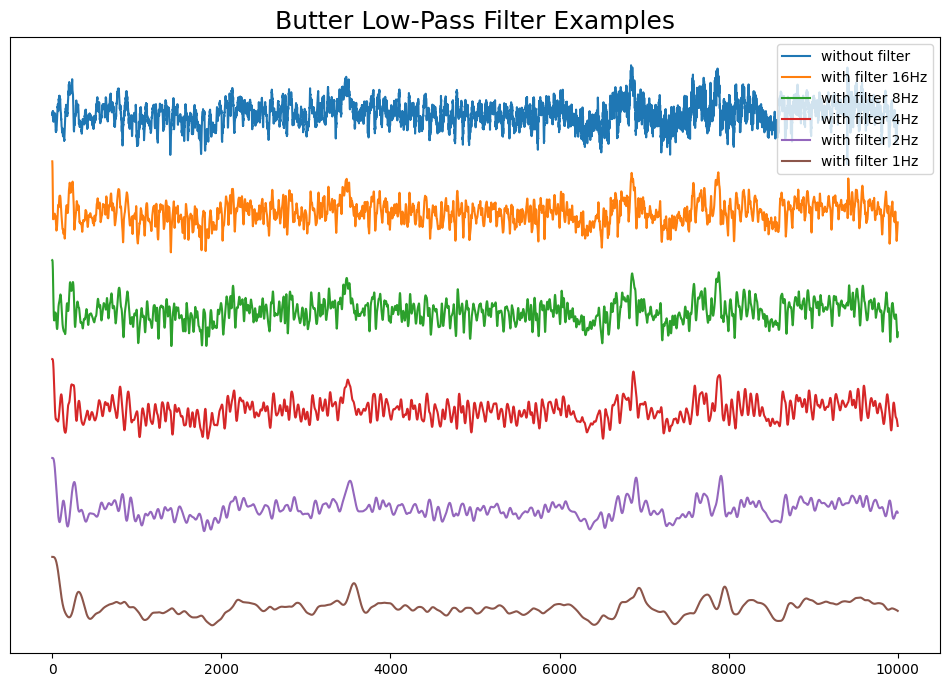

In [15]:
frequencies = [1,2,4,8,16][::-1] # frequencies in Hz
x = [all_eegs[eeg_ids[0]][:,0]] # select one EEG feature

for frequency in frequencies:
    x.append(butter_lowpass_filter(x[0], cutoff_freq=frequency))

plt.figure(figsize=(12,8))
plt.plot(range(10_000), x[0], label='without filter')
for k in range(1,len(x)):
    plt.plot(range(10_000),x[k]-k*(x[0].max()-x[0].min()), label=f'with filter {frequencies[k-1]}Hz')

plt.legend()
plt.yticks([])
plt.title('Butter Low-Pass Filter Examples',size=18)
plt.show()

In [16]:
# EEGDatasetクラスのインスタンスを作成
    # EEGDatasetクラスの__init__メソッドが呼び出し
    # __init__メソッドにおいて、インスタンス変数に各引数を割り当て（self.df = train, self.eegs = all_eegsなど）
train_dataset = EEGDataset(train, CFG, mode="train")

# PyTorchクラスのインスタンスを作成。DataLoaderはデータセットからデータをバッチ単位で効率的に読み込むためのユーテユーティリティ
    # DataLoaderのインスタンス変数に引数を割り当て
train_loader = DataLoader(
    train_dataset,
    batch_size=CFG.batch_size,
    shuffle=False,
    num_workers=CFG.num_workers, pin_memory=True, drop_last=True
)

# 作成したtrain_datasetから最初の要素を取得し、EEGデータとラベルを抽出
    # EEGDatasetやDataLoaderが適切にデータが読み込めることを確認
# train_datasetの__getitem__メソッドによって以下が実行される
    # 1. __data_generationメソッドが呼び出され、EEGデータX(Numpy配列)とラベルy(Numpy配列)が生成
    # 2. __getitem__メソッド内でXとy_probがPyTorchのTensorに変換
    # 3. output辞書が__getitem__メソッドから返され、train_dataset[0]として得られる
    # 4. output["eeg"]とoutput["label"]から、PyTorchのTensorオブジェクトX, yが取り出される
output = train_dataset[0]
X, y = output["eeg"], output["labels"]
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: torch.Size([10000, 8])
y shape: torch.Size([6])


In [17]:
train_dataset[0]

{'eeg': tensor([[-4.9450e-04,  3.9937e-03,  1.7292e-03,  ..., -4.9706e-03,
          -3.5263e-03,  9.1361e-04],
         [-1.7959e-03,  2.7603e-02,  1.3223e-02,  ..., -3.4858e-02,
          -2.6953e-02,  7.3495e-03],
         [-5.2400e-04,  9.2459e-02,  4.8069e-02,  ..., -1.1657e-01,
          -9.8725e-02,  2.8260e-02],
         ...,
         [ 4.5406e-01, -1.6855e+00, -8.9432e-01,  ..., -1.2598e-01,
          -3.6902e-01, -1.3539e-01],
         [ 6.1357e-01, -1.7399e+00, -7.2602e-01,  ..., -5.4736e-02,
          -4.1980e-01,  6.0740e-03],
         [ 7.4734e-01, -1.8233e+00, -6.3830e-01,  ..., -1.1115e-02,
          -4.2626e-01,  1.1681e-01]]),
 'labels': tensor([0.7917, 0.0417, 0.0417, 0.0417, 0.0417, 0.0417])}

In [18]:
if CFG.visualize:
    # バッチデータを取り出す
    for batch in train_loader:
        # バッチからX(EEGデータ)とy(ラベル)を取り出す
        X = batch.pop("eeg")    # 3次元のTensor, (バッチサイズ, 10_000, 8): バッチサイズ個の10_000ポイントのEEG波形データを、8つの特徴量ごとに持つ
        y = batch.pop("labels")

        # バッチの最初の4サンプルについて描画
        for item in range(4):
            plt.figure(figsize=(20,4))
            offset = 0 # 描画の際に波形の位置をずらすためのオフセット

            # 
            for col in range(X.shape[-1]):
                if col != 0:
                    offset -= X[item,:,col].min()
                plt.plot(range(10000), X[item,:,col]+offset,label=f'feature {col+1}')
                offset += X[item,:,col].max()
            tt = f'{y[col][0]:0.1f}'
            for t in y[col][1:]:
                tt += f', {t:0.1f}'
            plt.title(f'EEG_Id = {eeg_ids[item]}\nTarget = {tt}',size=14)
            plt.legend()
            plt.show()
        break

# Model

In [ ]:
class ResNet_1D_Block(nn.Module):
    """
    ResNetの残差ブロックを作成する、PyTorchのnn.Moduleを継承したカスタムモジュール
    """

    def __init__(self, in_channels, out_channels, kernel_size, stride, padding, downsampling):
        super(ResNet_1D_Block, self).__init__() # 継承した親クラス(nn.Moduleクラス)のコンストラクタを呼び出し
        self.bn1 = nn.BatchNorm1d(num_features=in_channels)     # 入力データのバッチ正規化
        self.relu = nn.ReLU(inplace=False)                      # ReLU活性化関数を適用
        self.dropout = nn.Dropout(p=0.0, inplace=False)         # ドロップアウト層を適用
        self.conv1 = nn.Conv1d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size,     # 1D畳み込み層を適用 
                               stride=stride, padding=padding, bias=False)
        self.bn2 = nn.BatchNorm1d(num_features=out_channels)    # バッチ正規化
        self.conv2 = nn.Conv1d(in_channels=out_channels, out_channels=out_channels, kernel_size=kernel_size,    # 1D畳み込み層を適用
                               stride=stride, padding=padding, bias=False)
        self.maxpool = nn.MaxPool1d(kernel_size=2, stride=2, padding=0) # MaxPooling層を適用
        self.downsampling = downsampling

    def forward(self, x):
        # ブロックの順伝搬を定義
        identity = x

        # 入力データを処理して出力を計算
        out = self.bn1(x)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.conv1(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.conv2(out)

        out = self.maxpool(out)
        identity = self.downsampling(x)

        # 出力outに入力データindentityを足し合わせて、Residual Connectionを実現
        out += identity
        return out


class EEGNet(nn.Module):

    def __init__(self, kernels, in_channels=20, fixed_kernel_size=17, num_classes=6):
        super(EEGNet, self).__init__()
        self.kernels = kernels
        self.planes = 24
        self.parallel_conv = nn.ModuleList()
        self.in_channels = in_channels
        
        for i, kernel_size in enumerate(list(self.kernels)):                                                            # 各カーネルごとに畳み込み
            sep_conv = nn.Conv1d(in_channels=in_channels, out_channels=self.planes, kernel_size=(kernel_size),
                               stride=1, padding=0, bias=False,)
            self.parallel_conv.append(sep_conv)

        self.bn1 = nn.BatchNorm1d(num_features=self.planes)                                                             # BatchNorm1d
        self.relu = nn.ReLU(inplace=False)                                                                              # ReLU
        self.conv1 = nn.Conv1d(in_channels=self.planes, out_channels=self.planes, kernel_size=fixed_kernel_size,        # 畳み込み
                               stride=2, padding=2, bias=False)
        self.block = self._make_resnet_layer(kernel_size=fixed_kernel_size, stride=1, padding=fixed_kernel_size//2)     # ResNetブロック
        self.bn2 = nn.BatchNorm1d(num_features=self.planes)                                                             # BatchNorm1d
        self.avgpool = nn.AvgPool1d(kernel_size=6, stride=6, padding=2)                                                 # 平均プーリング
        self.rnn = nn.GRU(input_size=self.in_channels, hidden_size=128, num_layers=1, bidirectional=True)               # GRU
        self.fc = nn.Linear(in_features=424, out_features=num_classes)                                                  # 全結合層

    def _make_resnet_layer(self, kernel_size, stride, blocks=9, padding=0):
        # ResNetブロックを作成
        layers = []
        downsample = None
        base_width = self.planes

        # ResNetブロック数 blocks 回のループを実行し、指定されたブロックだけ残差ブロックを作成
            # 各残差ブロックは、畳み込み層とダウンサンプリング層から構成
        for i in range(blocks):
            # ダウンサンプリング: 特徴量マップ（カーネル）のサイズを削減
            downsampling = nn.Sequential(
                    nn.MaxPool1d(kernel_size=2, stride=2, padding=0)
                )
            # ResNetの畳み込み層を作成
            layers.append(ResNet_1D_Block(in_channels=self.planes, out_channels=self.planes, kernel_size=kernel_size,
                                       stride=stride, padding=padding, downsampling=downsampling))

        return nn.Sequential(*layers)
    
    def extract_features(self, x):
        # EEGNetモデルの順伝搬中に呼び出され、入力データから特徴量ベクトルを生成する
        x = x.permute(0, 2, 1)
        out_sep = []

        for i in range(len(self.kernels)):
            # 畳み込み層を並列に適用し、それぞれの出力をリストに格納
            sep = self.parallel_conv[i](x)
            out_sep.append(sep)

        out = torch.cat(out_sep, dim=2)     # リスト内の出力を連結して特徴量マップを作成
        out = self.bn1(out)                 # Batch Normalization
        out = self.relu(out)                # ReLU
        out = self.conv1(out)               # 畳み込み層

        out = self.block(out)               # ResNetブロック
        out = self.bn2(out)                 # 平均プーリング
        out = self.relu(out)                # ReLU
        out = self.avgpool(out)             # 平均プーリング
        
        out = out.reshape(out.shape[0], -1)
        rnn_out, _ = self.rnn(x.permute(0, 2, 1))   # GRU (ゲート付きリカレントユニット, RNNの一種)
        new_rnn_h = rnn_out[:, -1, :]  
        
        

        new_out = torch.cat([out, new_rnn_h], dim=1) # GRU前の特徴ベクトルとGRUの出力を連結して最終的な特徴ベクトルを作成
        return new_out
    
    def forward(self, x):
        # ネットワークの順伝搬を定義
        # extract_features & 全結合層
        new_out = self.extract_features(x)
        result = self.fc(new_out)  

        return result

In [ ]:
import gc
iot = torch.randn(2, 10000, 8)#.cuda()
model = EEGNet(kernels=[3,5,7,9], in_channels=CFG.in_channels, fixed_kernel_size=5, num_classes=CFG.target_size)
output = model(iot)
print(output.shape)

del iot, model
gc.collect()

In [ ]:
import math
import torch
from torch.optim.optimizer import Optimizer


class Adan(Optimizer):
    """
    Implements a pytorch variant of Adan
    Adan was proposed in
    Adan: Adaptive Nesterov Momentum Algorithm for Faster Optimizing Deep Models[J]. arXiv preprint arXiv:2208.06677, 2022.
    https://arxiv.org/abs/2208.06677
    Arguments:
        params (iterable): iterable of parameters to optimize or dicts defining parameter groups.
        lr (float, optional): learning rate. (default: 1e-3)
        betas (Tuple[float, float, flot], optional): coefficients used for computing 
            running averages of gradient and its norm. (default: (0.98, 0.92, 0.99))
        eps (float, optional): term added to the denominator to improve 
            numerical stability. (default: 1e-8)
        weight_decay (float, optional): decoupled weight decay (L2 penalty) (default: 0)
        max_grad_norm (float, optional): value used to clip 
            global grad norm (default: 0.0 no clip)
        no_prox (bool): how to perform the decoupled weight decay (default: False)
    """

    def __init__(self, params, lr=1e-3, betas=(0.98, 0.92, 0.99), eps=1e-8,
                 weight_decay=0.2, max_grad_norm=0.0, no_prox=False):
        if not 0.0 <= max_grad_norm:
            raise ValueError("Invalid Max grad norm: {}".format(max_grad_norm))
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
        if not 0.0 <= betas[2] < 1.0:
            raise ValueError("Invalid beta parameter at index 2: {}".format(betas[2]))
        defaults = dict(lr=lr, betas=betas, eps=eps,
                        weight_decay=weight_decay,
                        max_grad_norm=max_grad_norm, no_prox=no_prox)
        super(Adan, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(Adan, self).__setstate__(state)
        for group in self.param_groups:
            group.setdefault('no_prox', False)

    @torch.no_grad()
    def restart_opt(self):
        for group in self.param_groups:
            group['step'] = 0
            for p in group['params']:
                if p.requires_grad:
                    state = self.state[p]
                    # State initialization

                    # Exponential moving average of gradient values
                    state['exp_avg'] = torch.zeros_like(p)
                    # Exponential moving average of squared gradient values
                    state['exp_avg_sq'] = torch.zeros_like(p)
                    # Exponential moving average of gradient difference
                    state['exp_avg_diff'] = torch.zeros_like(p)

    @torch.no_grad()
    def step(self):
        """
            Performs a single optimization step.
        """
        if self.defaults['max_grad_norm'] > 0:
            device = self.param_groups[0]['params'][0].device
            global_grad_norm = torch.zeros(1, device=device)

            max_grad_norm = torch.tensor(self.defaults['max_grad_norm'], device=device)
            for group in self.param_groups:

                for p in group['params']:
                    if p.grad is not None:
                        grad = p.grad
                        global_grad_norm.add_(grad.pow(2).sum())

            global_grad_norm = torch.sqrt(global_grad_norm)

            clip_global_grad_norm = torch.clamp(max_grad_norm / (global_grad_norm + group['eps']), max=1.0)
        else:
            clip_global_grad_norm = 1.0

        for group in self.param_groups:
            beta1, beta2, beta3 = group['betas']
            # assume same step across group now to simplify things
            # per parameter step can be easily support by making it tensor, or pass list into kernel
            if 'step' in group:
                group['step'] += 1
            else:
                group['step'] = 1

            bias_correction1 = 1.0 - beta1 ** group['step']

            bias_correction2 = 1.0 - beta2 ** group['step']

            bias_correction3 = 1.0 - beta3 ** group['step']

            for p in group['params']:
                if p.grad is None:
                    continue

                state = self.state[p]
                if len(state) == 0:
                    state['exp_avg'] = torch.zeros_like(p)
                    state['exp_avg_sq'] = torch.zeros_like(p)
                    state['exp_avg_diff'] = torch.zeros_like(p)

                grad = p.grad.mul_(clip_global_grad_norm)
                if 'pre_grad' not in state or group['step'] == 1:
                    state['pre_grad'] = grad

                copy_grad = grad.clone()

                exp_avg, exp_avg_sq, exp_avg_diff = state['exp_avg'], state['exp_avg_sq'], state['exp_avg_diff']
                diff = grad - state['pre_grad']

                update = grad + beta2 * diff
                exp_avg.mul_(beta1).add_(grad, alpha=1 - beta1)  # m_t
                exp_avg_diff.mul_(beta2).add_(diff, alpha=1 - beta2)  # diff_t
                exp_avg_sq.mul_(beta3).addcmul_(update, update, value=1 - beta3)  # n_t

                denom = ((exp_avg_sq).sqrt() / math.sqrt(bias_correction3)).add_(group['eps'])
                update = ((exp_avg / bias_correction1 + beta2 * exp_avg_diff / bias_correction2)).div_(denom)

                if group['no_prox']:
                    p.data.mul_(1 - group['lr'] * group['weight_decay'])
                    p.add_(update, alpha=-group['lr'])
                else:
                    p.add_(update, alpha=-group['lr'])
                    p.data.div_(1 + group['lr'] * group['weight_decay'])

                state['pre_grad'] = copy_grad

# Helper functions

In [ ]:
# ====================================================
# Helper functions
# ====================================================
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (remain %s)' % (asMinutes(s), asMinutes(rs))


def train_fn(fold, train_loader, model, criterion, optimizer, epoch, scheduler, device):
    # PyTorchを使ったNNモデルの学習関数

    # モデルを学習モードに設定
    model.train()

    # AMP(Automatic Mixed Precision)の初期化
    scaler = torch.cuda.amp.GradScaler(enabled=CFG.apex)
    losses = AverageMeter()
    start = end = time.time()
    global_step = 0

    # ループでバッチデータを読み込み
    for step, batch in enumerate(train_loader):
        # バッチのデータをデバイスに送信
        eegs = batch['eeg'].to(device)
        labels = batch['labels'].to(device)
        batch_size = labels.size(0)

        # モデルで予測をおこない、損失を計算
        with torch.cuda.amp.autocast(enabled=CFG.apex):
            y_preds= model(eegs)
            loss = criterion(F.log_softmax(y_preds, dim=1), labels)

        # グラデーションスケーリングを使用して勾配を計算し、パラメータを更新
        if CFG.gradient_accumulation_steps > 1:
            loss = loss / CFG.gradient_accumulation_steps
        losses.update(loss.item(), batch_size)
        scaler.scale(loss).backward()
        # 勾配のノルムを制限
        grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), CFG.max_grad_norm)
        
        # 勾配蓄積のステップごとにオプティマイザを更新
        if (step + 1) % CFG.gradient_accumulation_steps == 0:
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad() # モデル内のパラメータの勾配を初期化
            global_step += 1
            if CFG.batch_scheduler:
                scheduler.step()
        end = time.time()

        # 進捗の表示
        if step % CFG.print_freq == 0 or step == (len(train_loader)-1):
            print('Epoch: [{0}][{1}/{2}] '
                  'Elapsed {remain:s} '
                  'Loss: {loss.val:.4f}({loss.avg:.4f}) '
                  'Grad: {grad_norm:.4f}  '
                  'LR: {lr:.8f}  '
                  .format(epoch+1, step, len(train_loader), 
                          remain=timeSince(start, float(step+1)/len(train_loader)),
                          loss=losses,
                          grad_norm=grad_norm,
                          lr=scheduler.get_lr()[0]))
        if CFG.wandb:
            wandb.log({f"[fold{fold}] loss": losses.val,
                       f"[fold{fold}] lr": scheduler.get_lr()[0]})
            
    # 平均損失を返却
    return losses.avg


def valid_fn(valid_loader, model, criterion, device):
    losses = AverageMeter()

    # evalモードに設定
    model.eval()
    preds = []
    targets = []
    start = end = time.time()
    for step, batch in enumerate(valid_loader):
        eegs = batch['eeg'].to(device)
        labels = batch['labels'].to(device)
        batch_size = labels.size(0)
        
        # モデルで予測をおこない、損失を計算。ここで、勾配は計算しない。
        with torch.no_grad():
            y_preds = model(eegs)
            loss = criterion(F.log_softmax(y_preds, dim=1), labels)
        # 損失を更新
        if CFG.gradient_accumulation_steps > 1:
            loss = loss / CFG.gradient_accumulation_steps
        losses.update(loss.item(), batch_size)
        # 予測値と真のラベルをリストに追加
        preds.append(nn.Softmax(dim=1)(y_preds).to('cpu').numpy())
        targets.append(labels.to('cpu').numpy())
        end = time.time()
        if step % CFG.print_freq == 0 or step == (len(valid_loader)-1):
            print('EVAL: [{0}/{1}] '
                  'Elapsed {remain:s} '
                  'Loss: {loss.val:.4f}({loss.avg:.4f}) '
                  .format(step, len(valid_loader),
                          loss=losses,
                          remain=timeSince(start, float(step+1)/len(valid_loader))))
    predictions = np.concatenate(preds)
    targets = np.concatenate(targets)
    return losses.avg, predictions

# Train Loop

In [ ]:
# ====================================================
# train loop
# ====================================================
def train_loop(folds, fold, directory):
    
    LOGGER.info(f"========== fold: {fold} training ==========")

    # ====================================================
    # loader
    # ====================================================
    if CFG.stage1_pop1:
        # stage1では、すべてのフォールドを学習に使用
        train_folds = folds[(folds['fold'] != fold)].reset_index(drop=True)
    else:
        # stage2では、total_evaluator >= 5のデータのみを学習に使用
        train_folds = folds[(folds['fold'] != fold) & (folds['total_evaluators'] >= 5)].reset_index(drop=True)
    # valid用のfoldを選択
    valid_folds = folds[(folds['fold'] == fold)].reset_index(drop=True)
    # valid用の目的変数のラベルを取得
    valid_labels = valid_folds[ CFG.target_cols].values
    
    # データセットの作成: train/validに分割し、EEGDatasetクラスのインスタンスを作成
    train_dataset = EEGDataset(train_folds, CFG, mode="train")
    valid_dataset = EEGDataset(valid_folds, CFG, mode="train")

    # DataLoaderを初期化
    train_loader = DataLoader(train_dataset,
                              batch_size=CFG.batch_size,
                              shuffle=True,
                              num_workers=CFG.num_workers, pin_memory=True, drop_last=True)
    valid_loader = DataLoader(valid_dataset,
                              batch_size=CFG.batch_size * 2,
                              shuffle=False,
                              num_workers=CFG.num_workers, pin_memory=True, drop_last=False)

    # ====================================================
    # model & optimizer
    # ====================================================
    # EEGNetクラスのインスタンス作成
    model = EEGNet(kernels=[3,5,7,9], in_channels=CFG.in_channels, fixed_kernel_size=5, num_classes=CFG.target_size)
    
    # Trueの場合、ステージ2のトレーニングをおこなう前に、ステージ1で学習したモデルの重みを読み込む
    if CFG.stage2_pop2:
        model_weight = POP_1_DIR + f"{CFG.model_name}_fold{fold}_best_version{VERSION}_stage1.pth"
        checkpoint = torch.load(model_weight, map_location=device)
        model.load_state_dict(checkpoint["model"]) # モデルの重みを読み込み
    model.to(device)    # モデルを指定したデバイスへ配置
    # CPMP: wrap the model to use all GPUs
    model = nn.DataParallel(model)  # 複数のGPUで並列処理できるようラップ
    
    def build_optimizer(cfg, model, device):
        lr = cfg.lr
        if cfg.optimizer == "SAM":
            base_optimizer = torch.optim.SGD  # define an optimizer for the "sharpness-aware" update
            optimizer_model = SAM(model.parameters(), base_optimizer, lr=lr, momentum=0.9, weight_decay=cfg.weight_decay, adaptive=True)
        elif cfg.optimizer == "Ranger21":
            optimizer_model = Ranger21(model.parameters(), lr=lr, weight_decay=cfg.weight_decay, 
            num_epochs=cfg.epochs, num_batches_per_epoch=len(train_loader))
        elif cfg.optimizer == "SGD":
            optimizer_model = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=cfg.weight_decay, momentum=0.9)
        elif cfg.optimizer == "Adam":
            optimizer_model = Adam(model.parameters(), lr=lr, weight_decay=CFG.weight_decay)
        elif cfg.optimizer == "Lion":
            optimizer_model = Lion(model.parameters(), lr=lr, weight_decay=cfg.weight_decay)
        elif cfg.optimizer == "Adan":
            optimizer_model = Adan(model.parameters(), lr=lr, weight_decay=cfg.weight_decay)
    
        return optimizer_model
    
    optimizer = build_optimizer(CFG, model, device)

    # ====================================================
    # scheduler
    # ====================================================
    # ====================================================

    # スケジューラ: オプティマイザ(最適化関数)の学習率を調整する機能
    # 指定されたオプティマイザに対して適切なスケジューラを作成
    def get_scheduler(optimizer):
        if CFG.scheduler=='ReduceLROnPlateau':
            # 検証損失が停滞した場合学習率を減少させるスケジューラ
            scheduler = ReduceLROnPlateau(optimizer, **CFG.reduce_params)
        elif CFG.scheduler=='CosineAnnealingLR':
            # コサイン関数を使用して学習率を減少させるスケジューラ
            scheduler = CosineAnnealingLR(optimizer, **CFG.cosanneal_params)
        elif CFG.scheduler=='CosineAnnealingWarmRestarts':
            # Warm Restartを組み合わせたコサイン関数を使用するスケジューラ
            scheduler = CosineAnnealingWarmRestarts(optimizer, **CFG.cosanneal_res_params)
        elif CFG.scheduler=='OneCycleLR':
            # 1サイクル学習率ポリシーを使用するスケジューラ
            steps_per_epoch=len(train_loader),
            scheduler = OneCycleLR(optimizer=optimizer, epochs=CFG.epochs, anneal_strategy="cos", pct_start=0.05, steps_per_epoch=len(train_loader),
        max_lr=CFG.lr, final_div_factor=100)
        return scheduler
    
    scheduler = get_scheduler(optimizer)

    # ====================================================
    # loop
    # ====================================================
    # KLダイバージェンス損失を計算するための損失関数を作成
    criterion = nn.KLDivLoss(reduction="batchmean")

    
    best_score = np.inf

    for epoch in range(CFG.epochs):

        start_time = time.time()

        # train
        # トレーニングデータでモデルを学習し、平均トレーニング損失を計算
        avg_loss = train_fn(fold, train_loader, model, criterion, optimizer, epoch, scheduler, device)

        # eval
        # validデータでモデルを評価し、平均バリデーション損失と予測結果を取得
        avg_val_loss, predictions = valid_fn(valid_loader, model, criterion, device)

        elapsed = time.time() - start_time

        LOGGER.info(f'Epoch {epoch+1} - avg_train_loss: {avg_loss:.4f}  avg_val_loss: {avg_val_loss:.4f}  time: {elapsed:.0f}s')
        if CFG.wandb:
            wandb.log({f"[fold{fold}] epoch": epoch+1, 
                       f"[fold{fold}] avg_train_loss": avg_loss, 
                       f"[fold{fold}] avg_val_loss": avg_val_loss,
                       f"[fold{fold}] score": score})
        
        # 最良のバリデーション損失を記録し、モデルの重みを保存
        if best_score > avg_val_loss:
            best_score = avg_val_loss
            LOGGER.info(f'Epoch {epoch+1} - Save Best valid loss: {avg_val_loss:.4f} Model')
            # CPMP: save the original model. It is stored as the module attribute of the DP model.
            if CFG.stage1_pop1:
                
                torch.save({'model': model.module.state_dict(),
                            'predictions': predictions},
                             directory+f"{CFG.model_name}_fold{fold}_best_version{VERSION}_stage1.pth")
            else:
                
                torch.save({'model': model.module.state_dict(),
                            'predictions': predictions},
                             directory+f"{CFG.model_name}_fold{fold}_best_version{VERSION}_stage2.pth")

    # モデルの予測結果の保存
    if CFG.stage1_pop1:
        predictions = torch.load(directory+f"{CFG.model_name}_fold{fold}_best_version{VERSION}_stage1.pth", 
                             map_location=torch.device('cpu'))['predictions']
    else:
        predictions = torch.load(directory+f"{CFG.model_name}_fold{fold}_best_version{VERSION}_stage2.pth", 
                             map_location=torch.device('cpu'))['predictions']
    valid_folds[[f"pred_{c}" for c in CFG.target_cols]] = predictions
    valid_folds[CFG.target_cols] = valid_labels 
    torch.cuda.empty_cache()
    gc.collect()
    
    # valid_folds: 最終的な予測値
    # score: 最小のスコア（最小の損失値）
    return valid_folds, best_score

In [ ]:
# Stage 1
if __name__ == '__main__':
    
    if CFG.train:
        oof_df = pd.DataFrame()
        scores = []
        for fold in range(CFG.n_fold):
            if fold in CFG.trn_fold:
                _oof_df, score = train_loop(train, fold, POP_1_DIR)
                oof_df = pd.concat([oof_df, _oof_df])
                scores.append(score)
                LOGGER.info(f"========== fold: {fold} result ==========")
                LOGGER.info(f'Score with best loss weights stage1: {score}')
        oof_df = oof_df.reset_index(drop=True)
        LOGGER.info(f"========== CV ==========")
        LOGGER.info(f'Score with best loss weights: {np.mean(scores)}')
        oof_df.to_csv(POP_1_DIR+f'{CFG.model_name}_oof_df_version{VERSION}_stage1.csv', index=False)
        
    if CFG.wandb:
        wandb.finish()

In [ ]:
# Stage 2
# パラメータを変えて、train_loopで行われる処理を変更
CFG.stage1_pop1 = False
CFG.stage2_pop2 = True
CFG.epochs = 20


if __name__ == '__main__':
    
    if CFG.train:
        oof_df = pd.DataFrame()
        scores = []
        for fold in range(CFG.n_fold):
            if fold in CFG.trn_fold:
                _oof_df, score = train_loop(train, fold, POP_2_DIR)
                oof_df = pd.concat([oof_df, _oof_df])
                scores.append(score)
                LOGGER.info(f"========== fold: {fold} result ==========")
                LOGGER.info(f'Score with best loss weights stage2: {score}')
        oof_df = oof_df.reset_index(drop=True)
        LOGGER.info(f"========== CV ==========")
        LOGGER.info(f'Score with best loss weights: {np.mean(scores)}')
        oof_df.to_csv(POP_2_DIR+f'{CFG.model_name}_oof_df_version{VERSION}_stage2.csv', index=False)
        
    if CFG.wandb:
        wandb.finish()

In [ ]:
import sys
sys.path.append('/kaggle/input/kaggle-kl-div')
from kaggle_kl_div import score

# === Pre-process OOF ===
label_cols = CFG.target_cols
gt = oof_df[["eeg_id"] + CFG.target_cols]
gt.sort_values(by="eeg_id", inplace=True)
gt.reset_index(inplace=True, drop=True)

preds = oof_df[["eeg_id"] + CFG.pred_cols]
preds.columns = ["eeg_id"] + CFG.target_cols
preds.sort_values(by="eeg_id", inplace=True)
preds.reset_index(inplace=True, drop=True)

y_trues = gt[CFG.target_cols]
y_preds = preds[CFG.target_cols]

oof = pd.DataFrame(y_preds.copy())
oof['id'] = np.arange(len(oof))

true = pd.DataFrame(y_trues.copy())
true['id'] = np.arange(len(true))

cv = score(solution=true, submission=oof, row_id_column_name='id')
print('CV Stage2 Score with resnet1D_gru Raw EEG =',cv)